In [1]:
#topic -- > outline -- > blog post

In [2]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict 
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
load_dotenv() 

google_api_key = os.getenv("GOOGLE_API_KEY") 
model = ChatGoogleGenerativeAI(google_api_key=google_api_key, model="gemini-2.5-flash", temperature=0.7)

In [4]:
class LLMBlog(TypedDict):
    topic: str
    outline: str
    blog_post: str

def generate_outline(state: LLMBlog) -> LLMBlog:
    topic = state["topic"]
    prompt = f"Create a detailed outline for a blog post about: {topic}"
    outline = model.invoke(prompt)
    state["outline"] = outline
    return state 

def generate_blog_post(state: LLMBlog) -> LLMBlog:
    outline = state["outline"]
    prompt = f"Write a comprehensive blog post based on the following outline:\n{outline}"
    blog_post = model.invoke(prompt)
    state["blog_post"] = blog_post
    return state

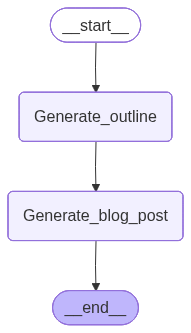

In [5]:
state_graph = StateGraph(LLMBlog) 

state_graph.add_node("Generate_outline", generate_outline) 
state_graph.add_node("Generate_blog_post", generate_blog_post) 

state_graph.add_edge(START, "Generate_outline")
state_graph.add_edge("Generate_outline", "Generate_blog_post")
state_graph.add_edge("Generate_blog_post", END)

workflow = state_graph.compile()

workflow


In [7]:
input_data = {
    "topic": "Relationship between India and China"
}
output = workflow.invoke(input_data)

In [8]:
output["blog_post"] 

AIMessage(content='## The Elephant and the Dragon: Navigating the Complex Dance Between India and China\n\nIn the grand theatre of 21st-century geopolitics, few relationships hold as much sway as that between India and China. Two ancient civilizations, two rising economic powerhouses, and two nuclear-armed neighbours – their dynamic is a complex tapestry woven with threads of cooperation, fierce competition, and occasional, sharp conflict. From the ancient Silk Road connecting their cultures to the post-independence "Hindi-Chini bhai-bhai" camaraderie, their shared history is long and often intertwined. However, the optimism of the early years was shattered by the 1962 border war, a turning point that fundamentally reshaped their interactions.\n\nToday, the India-China relationship is a multifaceted blend of deep economic interdependence, intense geopolitical rivalry, and persistent border disputes, constantly reshaping the Asian and global landscape. This post will delve into the hist

In [9]:
output["outline"]

AIMessage(content='Here\'s a detailed outline for a blog post about the relationship between India and China, designed to be informative, engaging, and well-structured.\n\n---\n\n## Blog Post Title Options:\n\n*   The Elephant and the Dragon: Navigating the Complex Dance Between India and China\n*   Beyond the Himalayas: Understanding India and China\'s Evolving Relationship\n*   Cooperation, Competition, and Conflict: The India-China Dynamic\n*   Two Giants, One Continent: A Deep Dive into India-China Relations\n*   The World\'s Most Consequential Rivalry? India and China\'s Intertwined Future\n\n---\n\n## **I. Introduction (Approx. 150-200 words)**\n\n*   **A. Catchy Hook:**\n    *   Start with a compelling statement about the two most populous nations, ancient civilizations, or their global significance.\n    *   *Example:* "In the grand theatre of 21st-century geopolitics, few relationships hold as much sway as that between India and China. Two ancient civilizations, two rising eco